In [5]:

!pip install -q numpy
!pip install -q pandas
!pip install -q gensim
!pip install -q pynndescent>=0.4
!pip install -q umap-learn
!pip install -q hdbscan
!pip install -q wordcloud
!pip install -q tensorflow
!pip install -q tensorflow_hub
!pip install -q tensorflow_text
!pip install -q torch
!pip install -q sentence_transformers
!pip install -q hnswlib
!pip install -q joblib<1.0.0

     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 5.2 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.8 MB 5.4 MB/s 
     |████████████████████████████████| 588.3 MB 14 kB/s 
     |████████████████████████████████| 6.0 MB 39.3 MB/s 
     |████████████████████████████████| 1.7 MB 49.4 MB/s 
     |████████████████████████████████| 439 kB 74.6 MB/s 
     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 5.8 MB 10.5 MB/s 
     |████████████████████████████████| 1.3 MB 56.2 MB/s 
     |████████████████████████████████| 182 kB 37.8 MB/s 
     |████████████████████████████████| 7.6 MB 56.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
/bin/bash: 1.0.0: No such file or directory


In [6]:
!pip install -q top2vec[sentence_transformers]

     |████████████████████████████████| 24.1 MB 8.2 MB/s 
     |████████████████████████████████| 67 kB 6.7 MB/s 


In [3]:
!pip install "numpy<1.23.0"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 4.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
from top2vec import Top2Vec

In [2]:
df = pd.read_csv("csv_Gita.csv")
del df['Unnamed: 1']
df


,The Bhagavad Gita
0,Introduced & Translated by
1,EKNATH EASWARAN
2,Chapter Introductions
3,by Diane Morrison
4,"On this path effort never goes to weree, and t..."
...,...
5893,E-book ISBN: 978–1–58638–023–6
5894,"I Easwaran, Eknath II Title"
5895,BL113862 E5 2007
5896,2945/924 2006934966


In [5]:
docs = df.stack().apply(str).tolist()

print(docs)

['Introduced & Translated by', 'EKNATH EASWARAN', 'Chapter Introductions', 'by Diane Morrison', 'On this path effort never goes to weree, and thbefore is no', 'failure Even a little effort toward spiritual awareness will', 'protect you from the great fear', '[2:40 ]', 'NILGIRI PRESS', '\x0cForeword', 'The Classics of', 'Indian Spirituality', 'Imagine a vast hall in Anglo-Saxon England, not long after the passing of', 'King Arthur It is the dead of winter and a fierce snowstorm rages outside,', 'but a great fire fills the space within the hall with warmth and light Now', 'and then, a sparrow dares in for refuge from the weather It appears as if', 'from nowhbefore, flits about joyfully in the light, and then disappears again,', 'and whbefore it comes from and whbefore it goes next in that stormy darkness, we', 'do not know', 'Our lives are like that, suggests an old story in Bede’s medieval history', 'of England We spend our days in the familiar world of our five senses, but', 'what lies

In [6]:
model = Top2Vec(docs, embedding_model='universal-sentence-encoder')

2022-12-27 19:34:00,593 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-12-27 19:34:00,839 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-12-27 19:34:27,856 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-12-27 19:34:29,855 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-12-27 19:35:12,363 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-12-27 19:35:12,599 - top2v

In [7]:
model.get_num_topics()


52

In [10]:
topic_words, word_scores, topic_nums = model.get_topics(5)

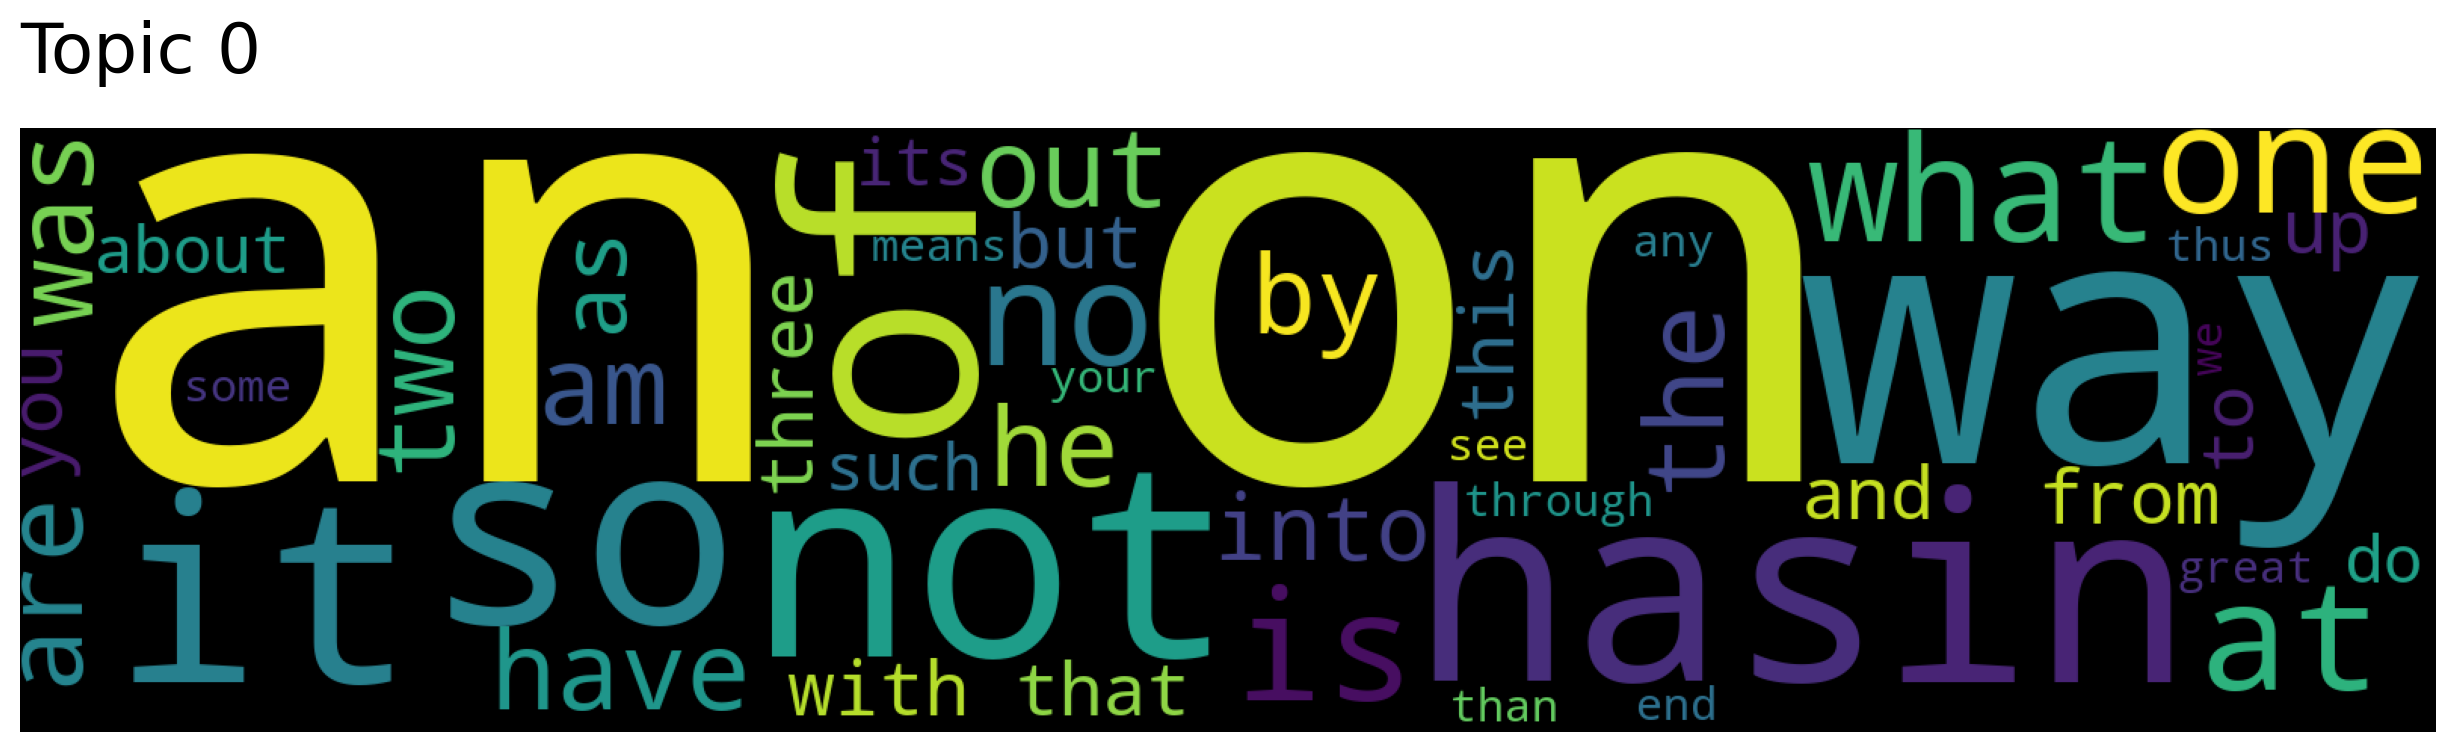

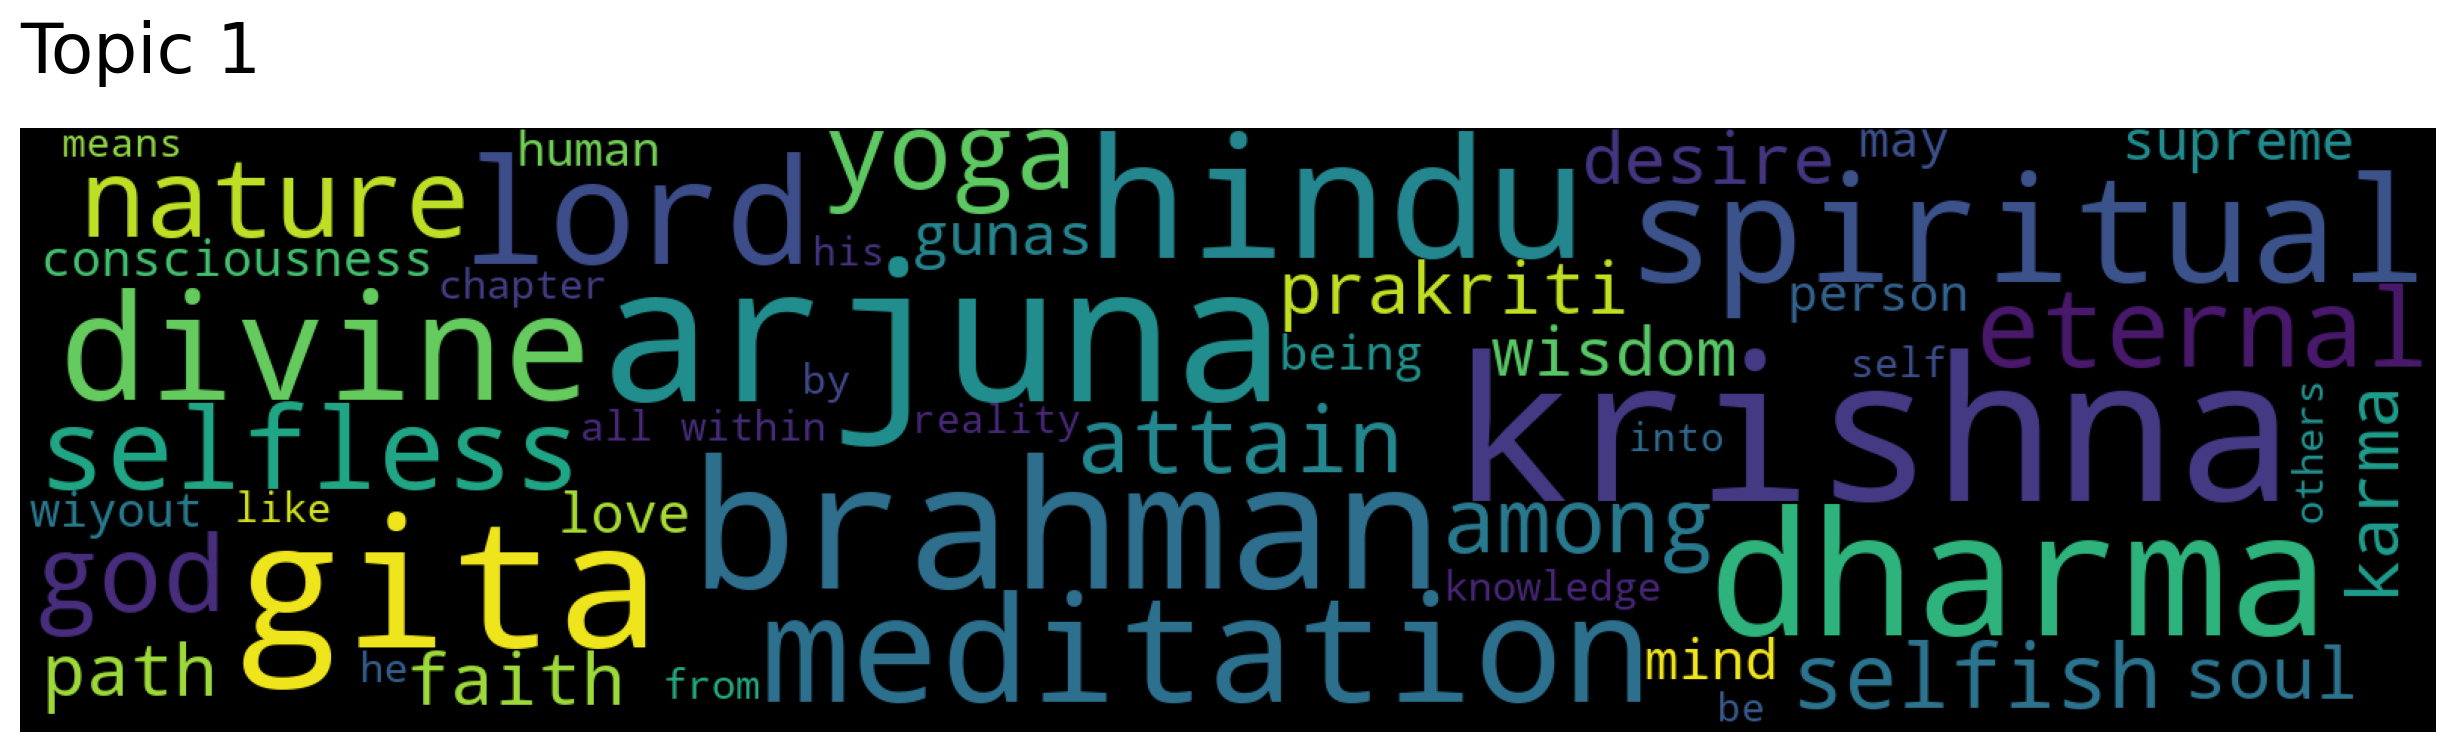

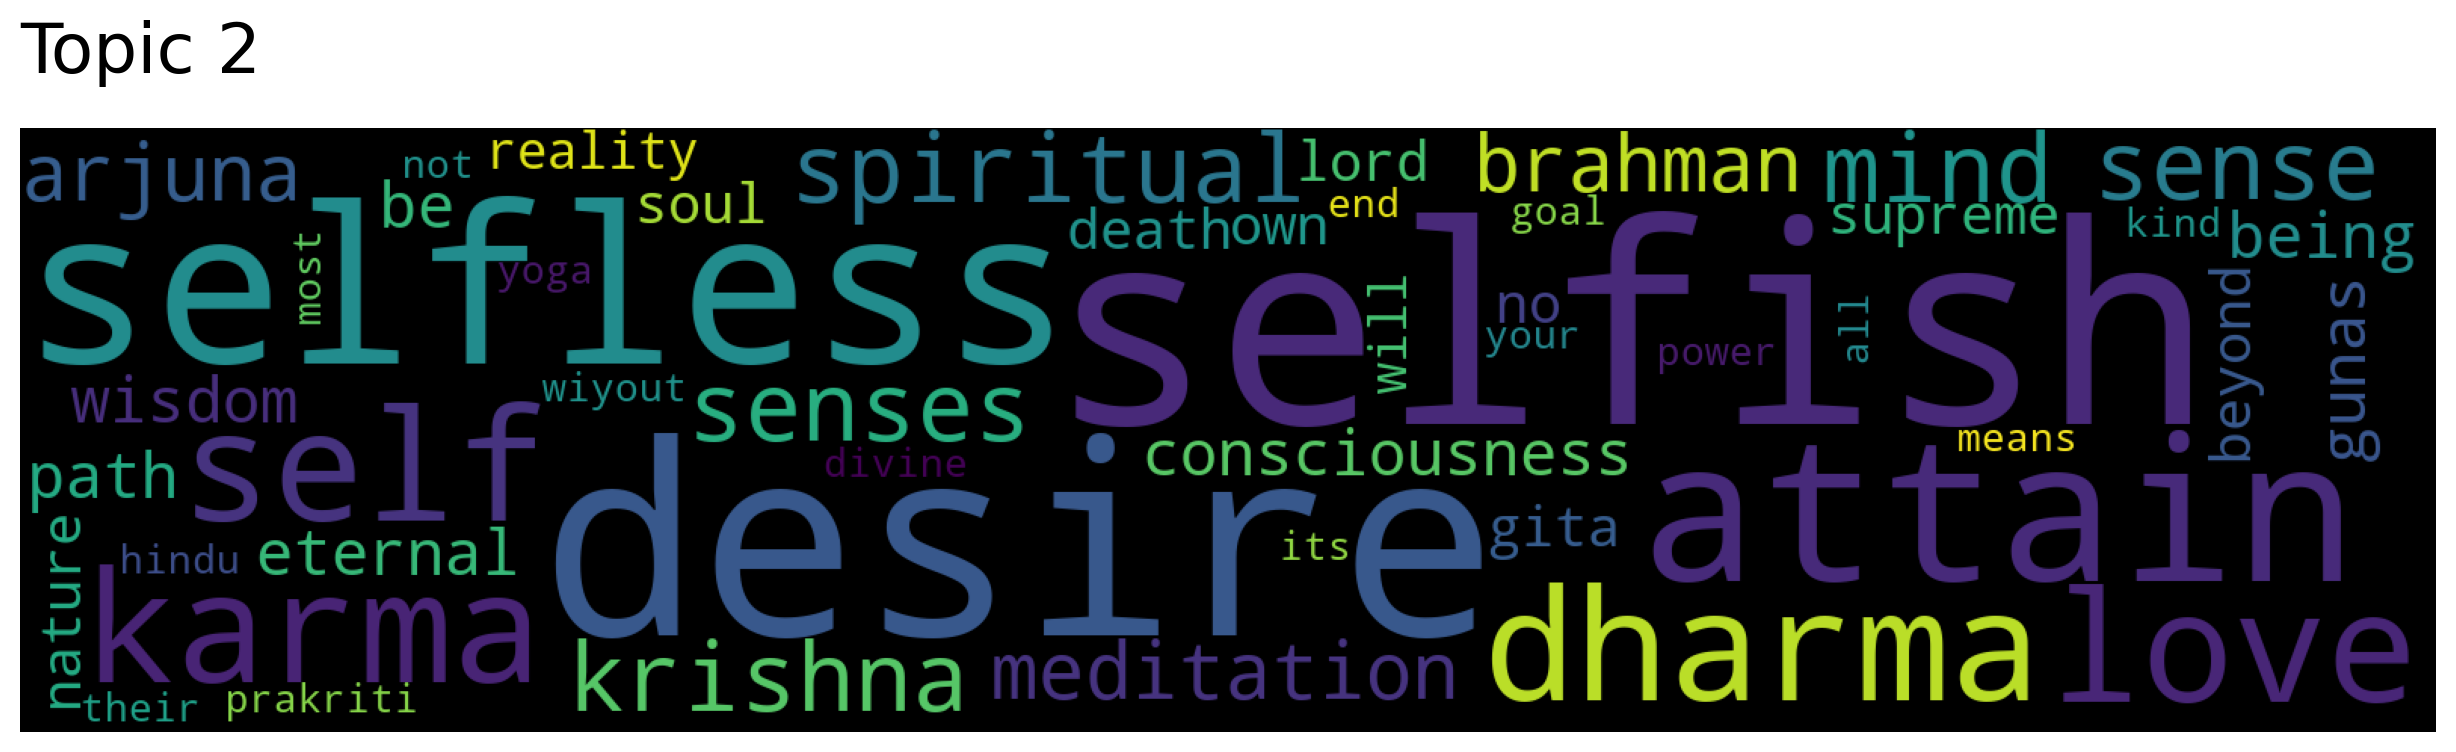

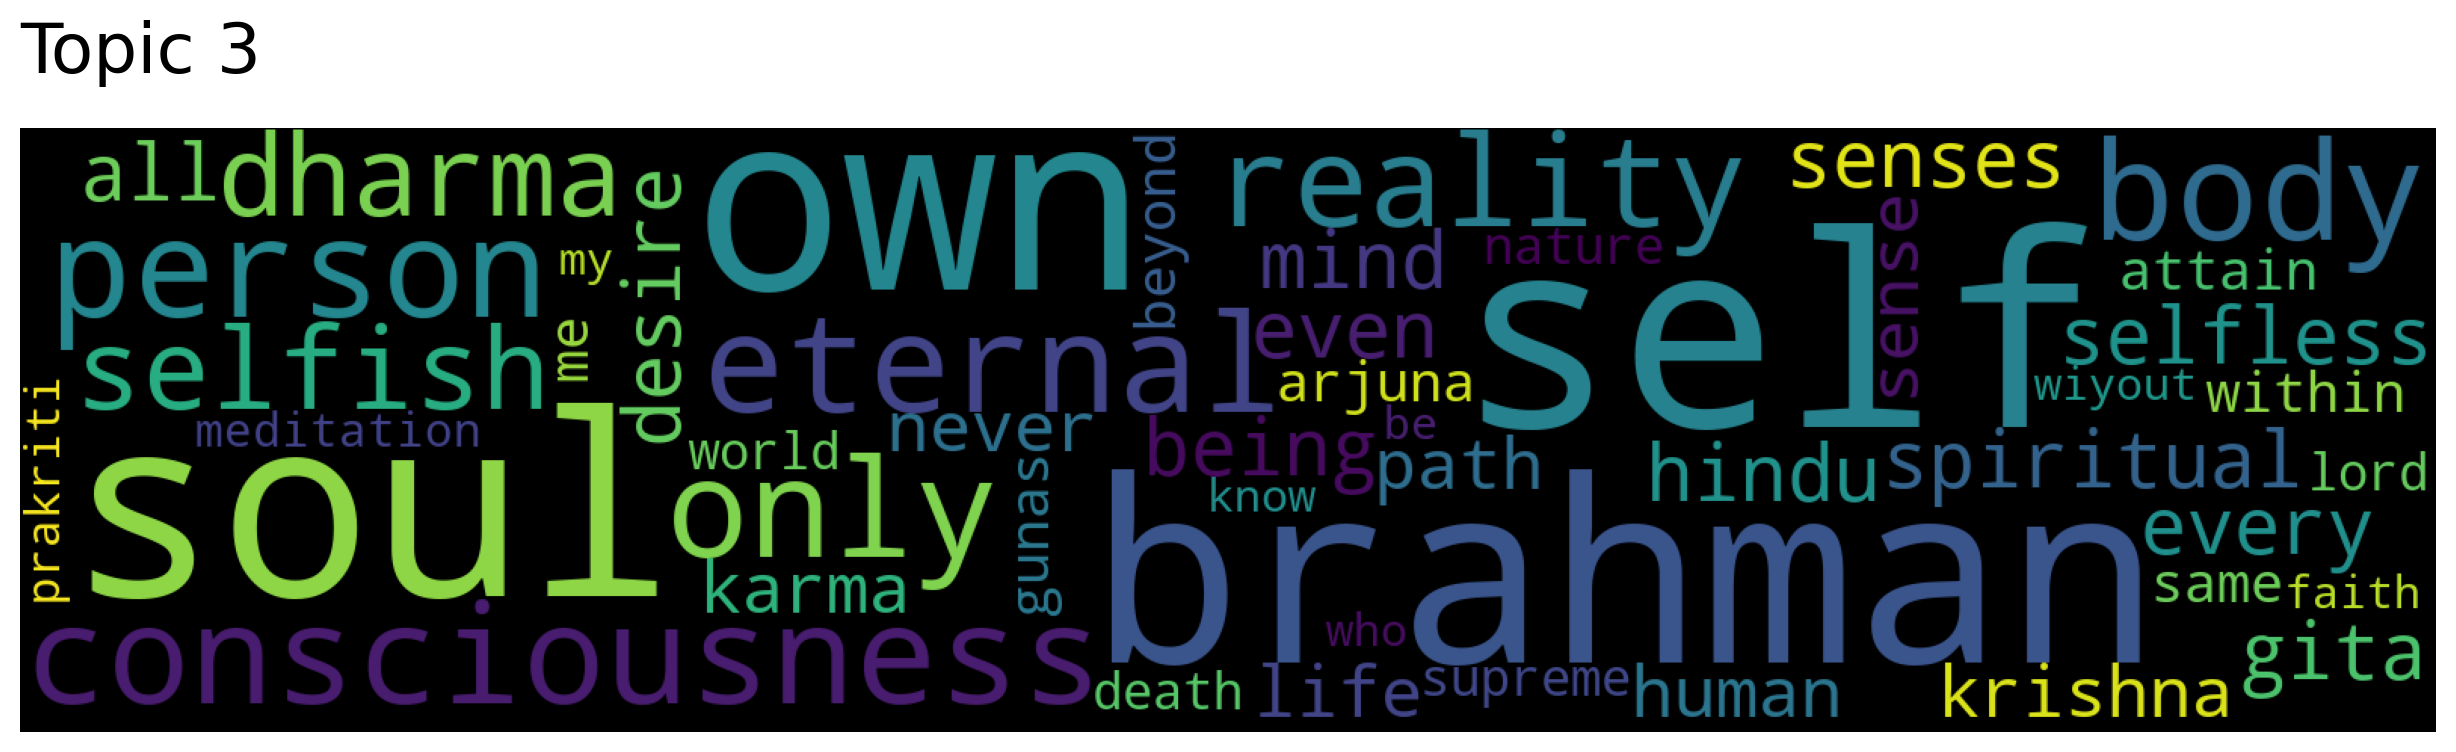

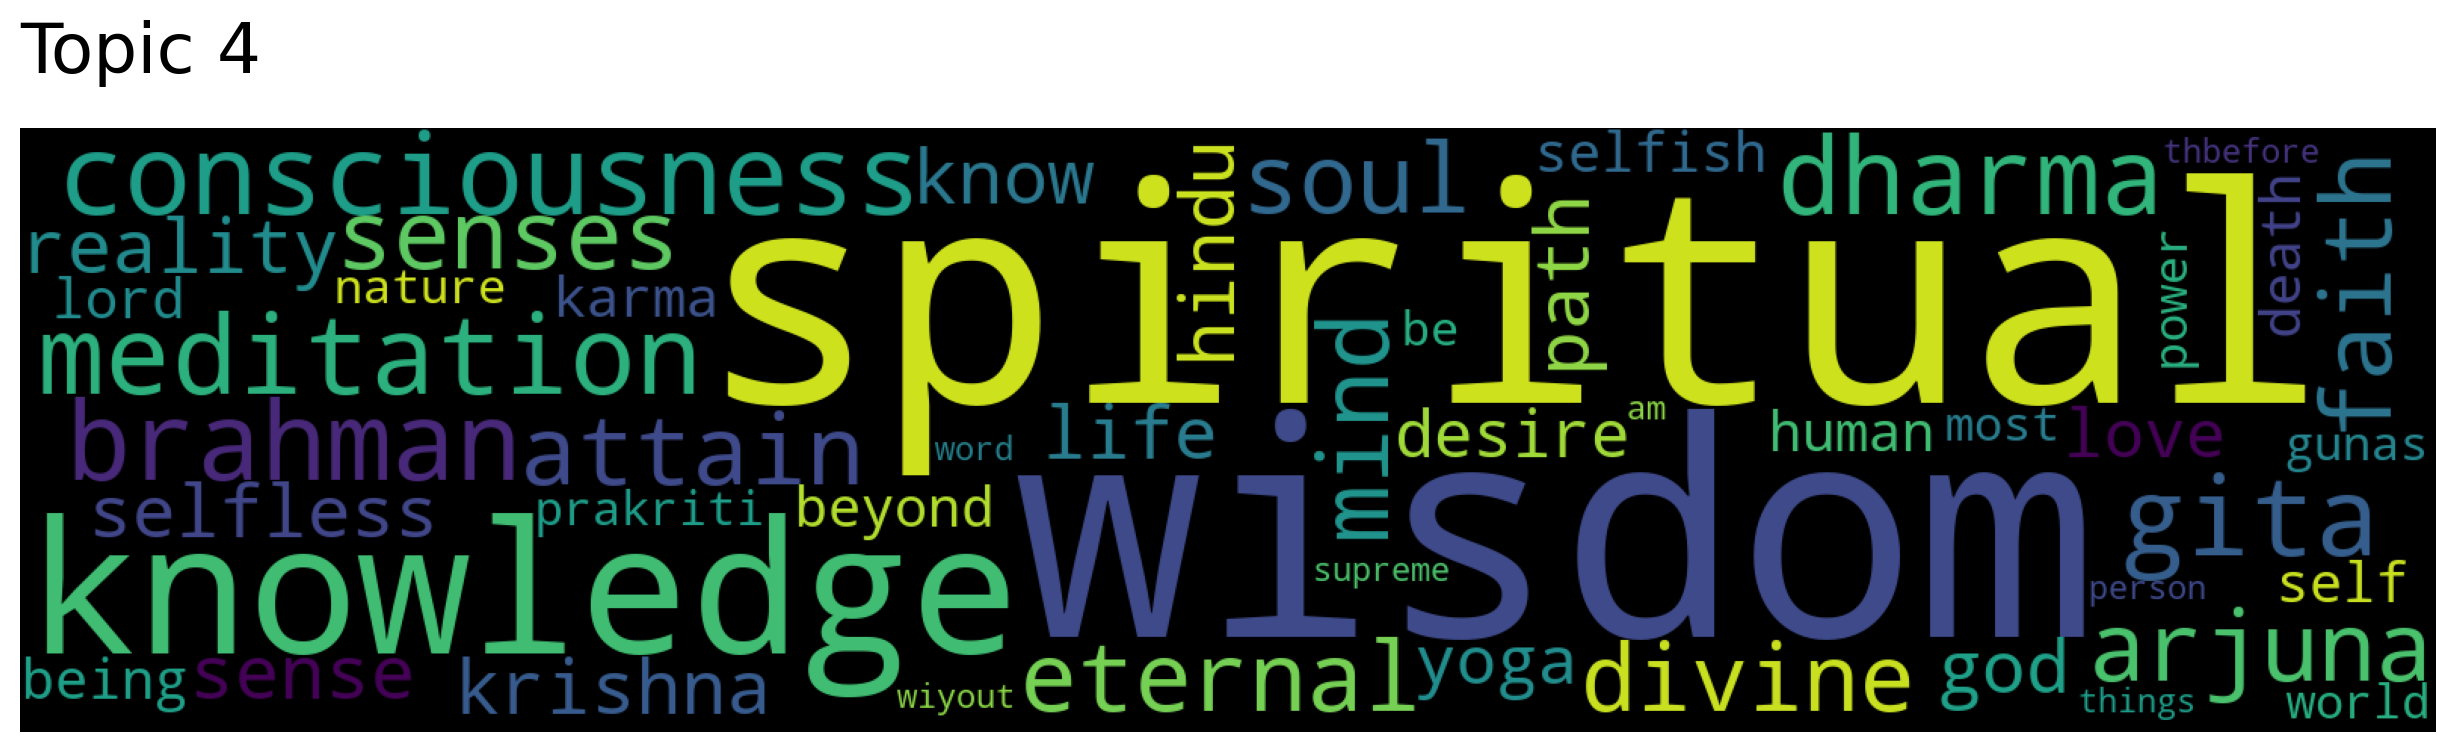

In [11]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)